# Statistical Property of Linear Regression Estimators
##### We all know that
1. An <b>estimator</b> is used to estimate the <b>estimand</b>.
    - $\bar{X}$ is used to estimate $\mu$, we write $\hat{\mu}=\bar{X}$
2. We plug data into our <b>estimator</b> to get a numerical <b>estimate</b> to the <b>estimand</b>
    - $\bar{X}=\frac{x_1+x_2+x_3}{3}=\frac{1.5+1.8+0.9}{3}=1.4$
    - The estimated population mean (by sample mean) is 1.4
3. Now let me tell you that the true population mean is 3 and we just get (un)lucky.
    - A numerical estimate itself is not enough
4. We better figure out the expectation of the estimator
    - $\mathbb{E}(\bar{X})$
5. We better figure out the uncertainty of the estimator caused by sampling variation
    - $\mathrm{Var}(\bar{X})$

## An example on $\bar{X}\rightarrow \mu$
##### We know that $\bar{X}$ is an unbiased estimator of $\mu$, i.e. $\mathbb{E}(\bar{X})=\mu$

In [1]:
data <- rnorm(n = 10, mean = 2, sd = 1)
mean(data)

[1] 1.704413

##### We know that $\bar{X}$ has a variance, $\mathrm{Var}(\bar{X})=\sqrt{\frac{\sigma^2}{n}}$

##### We know that $s^2$ is an unbiased estimator of $\sigma^2$.
Here we use the sample variance to estimate the population variance

In [2]:
sd(data)

[1] 0.551786

##### We know the formula for the sample confidence interval (95%)
$$ CI = \bar{x} \pm t_{n-1,\ 0.025} \times \sqrt{\frac{s^2}{n}} $$
We don't know the $\sigma^2$ thus use $s^2$. The penalty is using $t_{n-1}$ instead of $z$-score.

In [3]:
# A function that takes in a sample and returns the sample mean, and 95% sample confidence interval
sample_CI <- function(x) {
    sample.mean <- mean(x)
    sample.sd <- sd(x)
    n <- length(x)
    t <- qt(p = 0.025, df = n - 1, lower.tail = FALSE)
    lb <- sample.mean - t * sample.sd / sqrt(n)
    ub <- sample.mean + t * sample.sd / sqrt(n)
    return(list(LowerBound = lb, UpperBound = ub, Mean = sample.mean))
}

In [4]:
set.seed(423)
n.sim <- 100
lb <- ub <- mean <- numeric(n.sim)

for (i in 1:n.sim) {
    ci <- sample_CI(rnorm(n = 10, mean = 2, sd = 1))
    lb[i] <- ci$LowerBound
    ub[i] <- ci$UpperBound
    mean[i] <- ci$Mean
}

In [5]:
head(cbind(lb, mean, ub))

lb,mean,ub
1.142854,1.941906,2.740957
1.500941,2.212975,2.925010
1.403278,1.938028,2.472779
1.215559,1.919254,2.622950
1.491769,2.037865,2.583961
1.338960,2.031084,2.723209


In [6]:
# How many of these intervals contain the true value 2?
mean(lb<=2 & ub>=2)

[1] 0.96

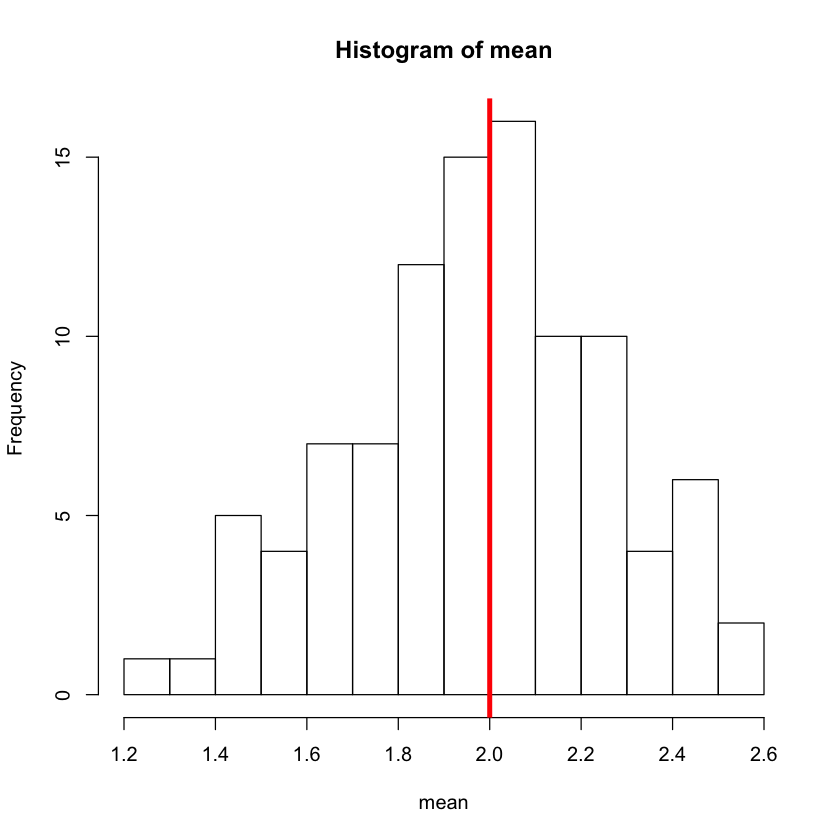

In [7]:
hist(mean, breaks = 10)
abline(v = 2, lwd = 4, col = "red")

## Back to Prof. Yang's notes
##### Recall the idea of simulation from last week.
- Similar to the $\bar{X}$ example, we generate some random $x$'s and generate some random $\epsilon$'s and we generate the $y$'s.
- Fit a linear regression to the sample, we will get the estimates of $\beta_0$ and $\beta_1$.
- We investigate the statistical properties of the estimators $\hat{\beta}_0$ and $\hat{\beta}_1$

In [8]:
# true SLR model setup
sim.linmod <- function(n, beta.0, beta.1, width, df) {
    # draw n points from a uniform distribution
    # centered on 0
    x <- runif(n, min = -width/2, max = width/2)
    # draw n points from a t distribution with the
    # given number of degrees # of freedom
    epsilon <- rt(n, df = df)
    # make y from a linear model
    y <- beta.0 + beta.1 * x + epsilon
    # return the data frame
    return(data.frame(x = x, y = y))
}

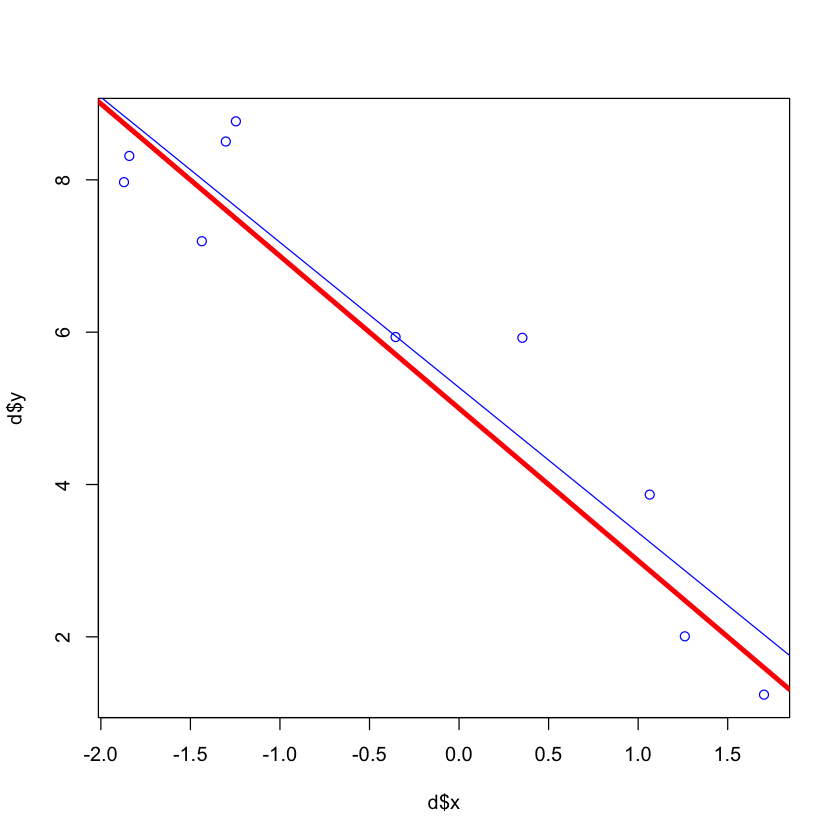

In [9]:
# sample 10 points from the SLR model
d = sim.linmod(n = 10, beta.0 = 5, beta.1 = -2, width = 4, df = 7)
# plot the data
plot(x = d$x, y = d$y, col = "blue") # fit least squares to the data
m = lm(y ~ x, data = d)
# plot the fitted regression line
abline(m, col = "blue")
# plot the true regression line
abline(a = 5, b = -2, lwd = 4, col = "red")

##### We can see that the fitted line (blue line) is different every time.
##### This is because of the sampling variation - each time we draw 10 different samples.
##### Let's repeat this process many times

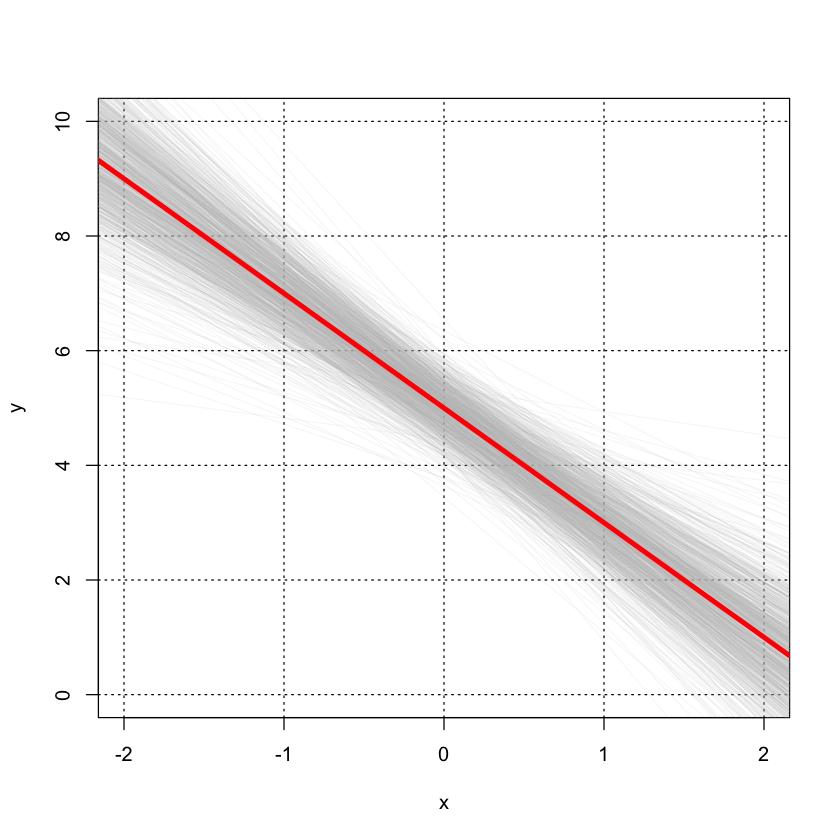

In [10]:
set.seed(423)
# set the number of repetitions
nrep = 1000
b0 <- rep(0, nrep)
b1 <- rep(0, nrep)
# Repeat data generation and model fitting nrep
# times plot the fitted regression line each time
# and save the fitted intercept in b0 and slope in b1
plot(NULL, xlim = c(-2,2), ylim = c(0,10), xlab = "x", ylab = "y")
# Add a grid
grid(col = "black")
for (i in 1:nrep) {
    lm.model <- lm(y ~ x,
                   data = sim.linmod(n = 10, beta.0 = 5, beta.1 = -2, width = 4, df = 7))
    b0[i] <- lm.model$coef[1]
    b1[i] <- lm.model$coef[2]
    abline(lm.model, col = "gray", lwd = 0.1)
}
# plot the true regression line
abline(a = 5, b = -2, lwd = 4, col = "red")

In [11]:
# Compute the sample mean of b0 and b1
mean(b0)

[1] 4.99653

In [12]:
mean(b1)

[1] -1.998722

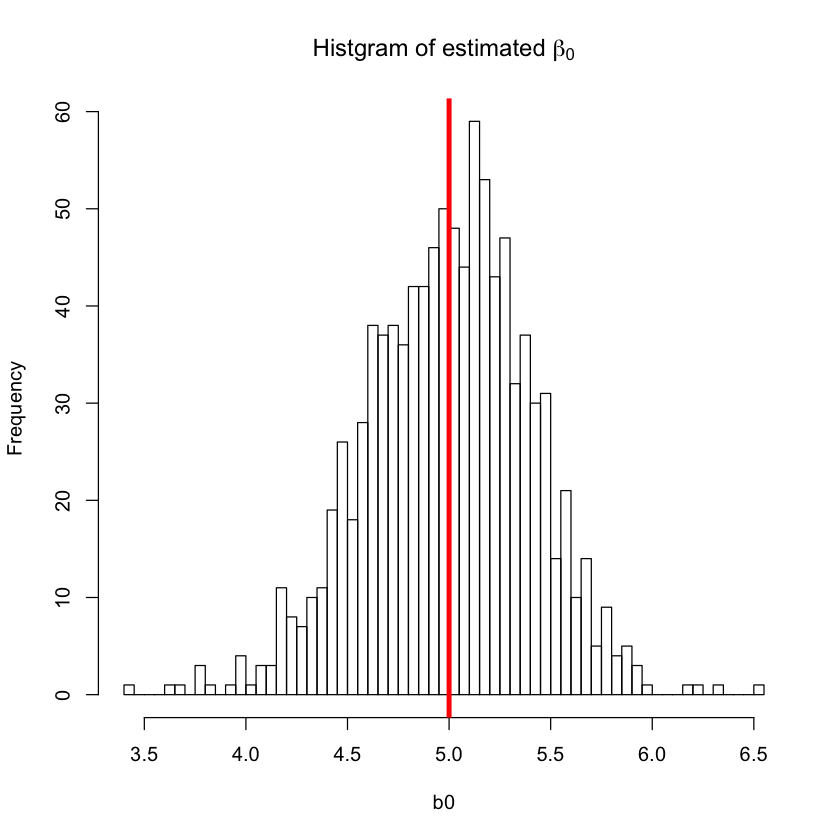

In [13]:
# Plot the histogram of b0 and b1
hist(b0, breaks = 100,
     main = expression(paste("Histgram of estimated ", beta[0])))
# plot the true value of b0
abline(v = 5, col = "red", lwd = 4)

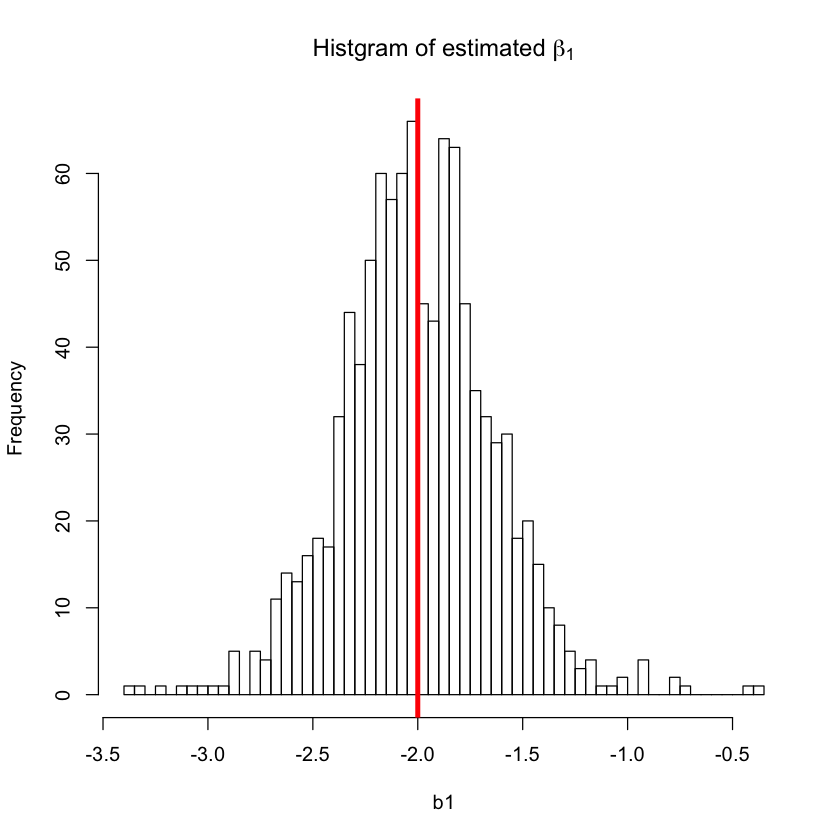

In [14]:
hist(b1, breaks = 100,
     main = expression(paste("Histgram of estimated ", beta[1])))
# plot the true value of b1
abline(v = -2, col = "red", lwd = 4)